# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [163]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [164]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [165]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]['temp_max']
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | port mathurin
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | santa cruz
Processing Record 7 of Set 1 | mindelo
Processing Record 8 of Set 1 | saipan
Processing Record 9 of Set 1 | tura
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | vilyuchinsk
Processing Record 13 of Set 1 | barra de santo antonio
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | stanley
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | boa vista
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | hanceville
Processing Record 22 of Set 1 | g

Processing Record 38 of Set 4 | soto la marina
Processing Record 39 of Set 4 | jurilovca
Processing Record 40 of Set 4 | tolanaro
Processing Record 41 of Set 4 | cedeira
Processing Record 42 of Set 4 | kill devil hills
Processing Record 43 of Set 4 | tazacorte
Processing Record 44 of Set 4 | krong kep
Processing Record 45 of Set 4 | al mayadin
Processing Record 46 of Set 4 | fortuna
Processing Record 47 of Set 4 | roma
Processing Record 48 of Set 4 | hasaki
Processing Record 49 of Set 4 | rio grande
Processing Record 0 of Set 5 | kingston
Processing Record 1 of Set 5 | chake chake
Processing Record 2 of Set 5 | uturoa
Processing Record 3 of Set 5 | puerto carreno
Processing Record 4 of Set 5 | mesolongi
Processing Record 5 of Set 5 | shirbin
Processing Record 6 of Set 5 | sittwe
Processing Record 7 of Set 5 | polyarnyy
Processing Record 8 of Set 5 | bikenibeu village
Processing Record 9 of Set 5 | geraldton
Processing Record 10 of Set 5 | dzilam gonzalez
Processing Record 11 of Set 5 |

Processing Record 33 of Set 8 | lethem
Processing Record 34 of Set 8 | gusinoozyorsk
Processing Record 35 of Set 8 | toga village
City not found. Skipping...
Processing Record 36 of Set 8 | shantou
Processing Record 37 of Set 8 | fauske
Processing Record 38 of Set 8 | lycksele
Processing Record 39 of Set 8 | awjilah
Processing Record 40 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 41 of Set 8 | sao vicente
Processing Record 42 of Set 8 | puerto deseado
Processing Record 43 of Set 8 | colonia menno
Processing Record 44 of Set 8 | khanty-mansiysk
Processing Record 45 of Set 8 | pitimbu
Processing Record 46 of Set 8 | joao pinheiro
Processing Record 47 of Set 8 | mongo
Processing Record 48 of Set 8 | prado
Processing Record 49 of Set 8 | nema
Processing Record 0 of Set 9 | outapi
City not found. Skipping...
Processing Record 1 of Set 9 | tabuk
Processing Record 2 of Set 9 | borzya
Processing Record 3 of Set 9 | karratha
Processing Record 4 of Set 9 | umm kaddadah
Proce

Processing Record 20 of Set 12 | bel ombre
Processing Record 21 of Set 12 | engenheiro beltrao
Processing Record 22 of Set 12 | mjolby
Processing Record 23 of Set 12 | pasargad
City not found. Skipping...
Processing Record 24 of Set 12 | pimentel
Processing Record 25 of Set 12 | vyshniy volochek
Processing Record 26 of Set 12 | stepnogorsk
Processing Record 27 of Set 12 | howard springs
Processing Record 28 of Set 12 | leninskoye
Processing Record 29 of Set 12 | yatou
Processing Record 30 of Set 12 | cuamba
Processing Record 31 of Set 12 | maqat
Processing Record 32 of Set 12 | kirovskiy
Processing Record 33 of Set 12 | itaituba
Processing Record 34 of Set 12 | songling
Processing Record 35 of Set 12 | road town
Processing Record 36 of Set 12 | xuddur
Processing Record 37 of Set 12 | sao miguel
Processing Record 38 of Set 12 | altai
Processing Record 39 of Set 12 | ahau
City not found. Skipping...
Processing Record 40 of Set 12 | inverloch
Processing Record 41 of Set 12 | kavieng
Proce

In [166]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [167]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,17.76,90,100,15.17,SJ,1712884839
1,port mathurin,-19.6833,63.4167,80.13,76,67,10.67,MU,1712884839
2,grytviken,-54.2811,-36.5092,28.36,67,2,10.36,GS,1712884839
3,iqaluit,63.7506,-68.5145,22.73,79,75,12.66,CA,1712884839
4,west island,-12.1568,96.8225,82.38,78,40,8.05,CC,1712884839


In [168]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [169]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,17.76,90,100,15.17,SJ,1712884839
1,port mathurin,-19.6833,63.4167,80.13,76,67,10.67,MU,1712884839
2,grytviken,-54.2811,-36.5092,28.36,67,2,10.36,GS,1712884839
3,iqaluit,63.7506,-68.5145,22.73,79,75,12.66,CA,1712884839
4,west island,-12.1568,96.8225,82.38,78,40,8.05,CC,1712884839


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

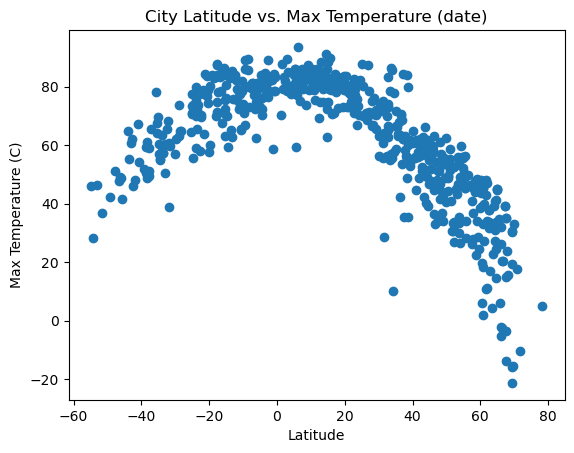

In [170]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (date)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

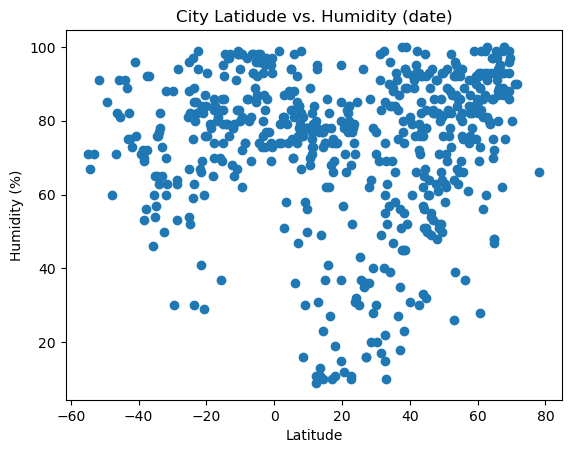

In [171]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latidude vs. Humidity (date)")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

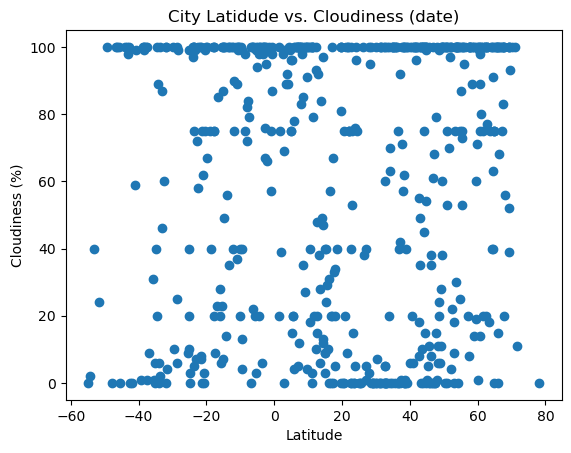

In [172]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latidude vs. Cloudiness (date)")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

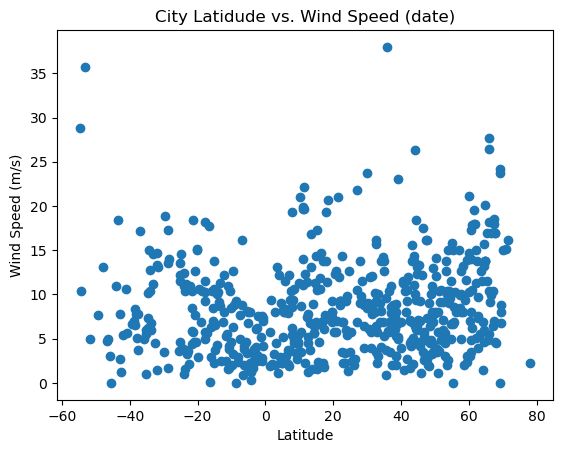

In [173]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latidude vs. Wind Speed (date)")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [174]:
# Define a function to create Linear Regression plots
def plot_line(x,y,compare):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
   
    print(f"The r-value is: {rvalue}")
    
    plt.xlabel('Latitude')
    plt.ylabel(compare)
    line_eq =  "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(x.min(),y.min()+10),fontsize=15,color="red")
    
    plt.plot(x, regress_values, color='red')
    plt.scatter(x,y)

In [175]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] > 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,17.76,90,100,15.17,SJ,1712884839
3,iqaluit,63.7506,-68.5145,22.73,79,75,12.66,CA,1712884839
6,mindelo,16.8901,-24.9804,71.15,68,20,13.80,CV,1712884840
7,saipan,15.1355,145.7010,88.50,62,40,17.27,MP,1712884840
8,tura,25.5198,90.2201,80.33,37,0,2.46,IN,1712884840


In [176]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port mathurin,-19.6833,63.4167,80.13,76,67,10.67,MU,1712884839
2,grytviken,-54.2811,-36.5092,28.36,67,2,10.36,GS,1712884839
4,west island,-12.1568,96.8225,82.38,78,40,8.05,CC,1712884839
5,santa cruz,-17.8000,-63.1667,74.66,83,75,5.75,BO,1712884840
10,papatowai,-46.5619,169.4708,47.73,71,100,4.76,NZ,1712884841


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8662432321845057


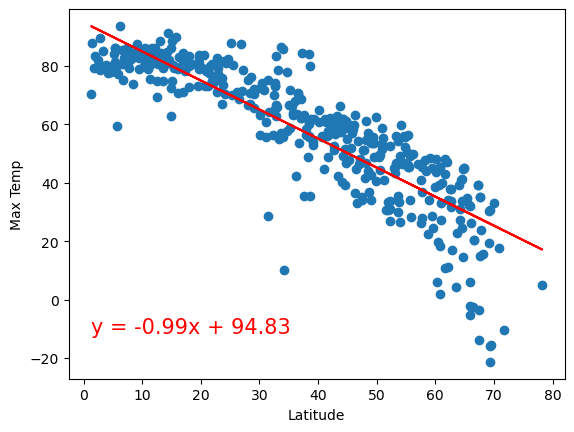

In [177]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df['Max Temp']
plot_line(x,y,'Max Temp')

The r-value is: 0.77716221242051


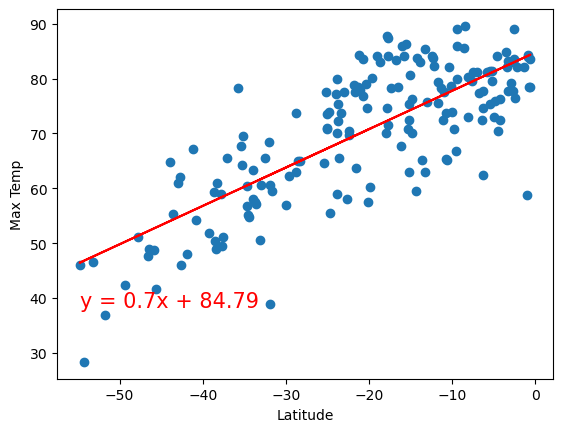

In [178]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df['Max Temp']
plot_line(x,y,'Max Temp')

**Discussion about the linear relationship:** The correlation between Temp and Latitude is the closer to the equator the higher the max temp is.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2703265950085797


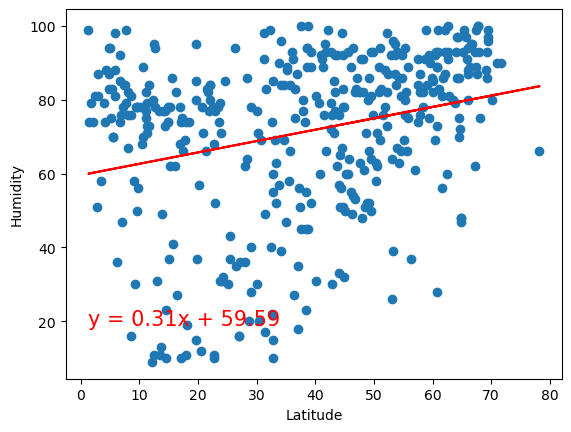

In [185]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df['Humidity']
plot_line(x,y,'Humidity')

The r-value is: 0.3235425262795091


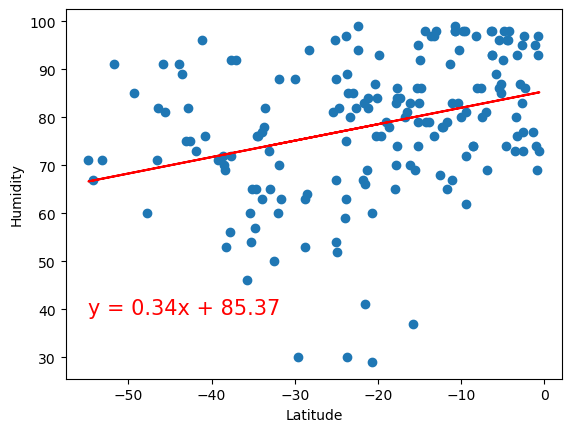

In [180]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df['Humidity']
plot_line(x,y,'Humidity')

**Discussion about the linear relationship:** There is a weak correlation that humidity increases as you go north.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.13894435703366317


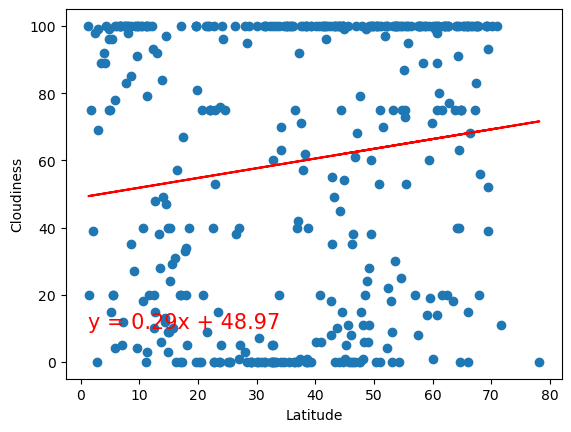

In [186]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df['Cloudiness']
plot_line(x,y,'Cloudiness')

The r-value is: 0.24421237536788298


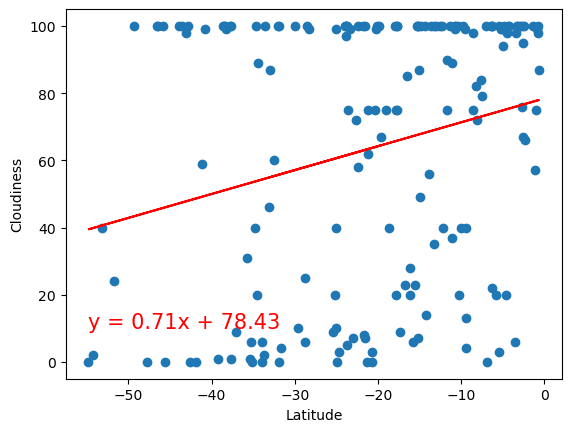

In [182]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df['Cloudiness']
plot_line(x,y,'Cloudiness')

**Discussion about the linear relationship:** cloudiness increases but also is more frequent in the northern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1706150011245184


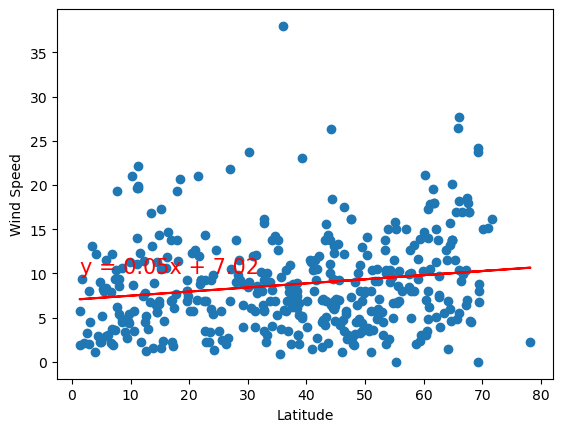

In [187]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df['Wind Speed']
plot_line(x,y,'Wind Speed')

The r-value is: -0.3280193262431676


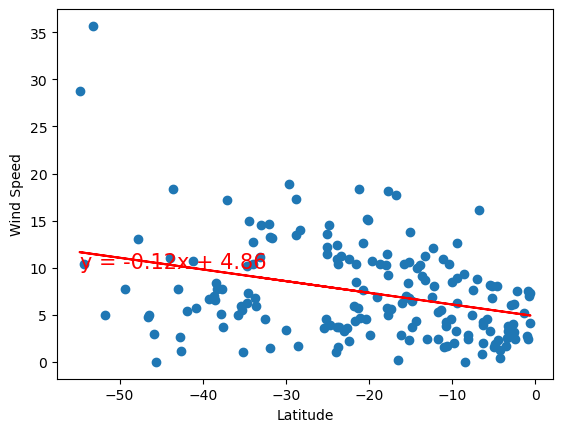

In [188]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df['Wind Speed']
plot_line(x,y,'Wind Speed')

**Discussion about the linear relationship:** Windspeed decreases as you reach the equator.